In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.inspection import permutation_importance

In [ ]:
data = pd.read_csv('matches22.csv')
data

,#VALUE!,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,8/11/2023,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65,21572,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17,8,13.9,0,0,0,2024,ManchesterCity
1,3,8/19/2023,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59,53419,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14,4,17.9,0,0,0,2024,ManchesterCity
2,4,8/27/2023,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79,31336,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29,9,17.3,2,0,1,2024,ManchesterCity
3,5,9/2/2023,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,1.4,68,52899,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,NaN,6,4,14.8,0,1,1,2024,ManchesterCity
4,6,9/16/2023,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,0.9,68,62475,Kyle Walker,4-2-3-1,Andy Madley,Match Report,NaN,29,13,16.4,1,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,36,4/24/2024,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,0.8,2.9,29,73549,Oliver Arblaster,3-5-1-1,Michael Salisbury,Match Report,NaN,10,4,17.8,1,0,0,2024,SheffieldUnited
756,37,4/27/2024,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,1.5,3.1,40,52196,Oliver Arblaster,3-5-1-1,Tony Harrington,Match Report,NaN,15,4,13.5,0,0,0,2024,SheffieldUnited
757,38,5/4/2024,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,2.2,1.5,54,28516,Jack Robinson,3-5-1-1,Chris Kavanagh,Match Report,NaN,16,4,18.0,0,1,1,2024,SheffieldUnited
758,39,5/11/2024,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,0.6,2.3,42,39221,Jack Robinson,3-5-1-1,Stuart Attwell,Match Report,NaN,13,1,21.0,0,0,0,2024,SheffieldUnited


In [ ]:
data.isna().sum()

,0
#VALUE!,0
Date,0
Time,0
Comp,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0


In [ ]:
data.drop(['Notes'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

,0
#VALUE!,0
Date,0
Time,0
Comp,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
#VALUE!,0
Date,0
Time,0
Comp,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0


In [ ]:
data = data.drop_duplicates()
data

,#VALUE!,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,8/11/2023,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65,21572,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,17,8,13.9,0,0,0,2024,ManchesterCity
1,3,8/19/2023,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59,53419,Kyle Walker,4-2-3-1,Robert Jones,Match Report,14,4,17.9,0,0,0,2024,ManchesterCity
2,4,8/27/2023,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79,31336,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,29,9,17.3,2,0,1,2024,ManchesterCity
3,5,9/2/2023,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,1.4,68,52899,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,6,4,14.8,0,1,1,2024,ManchesterCity
4,6,9/16/2023,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,0.9,68,62475,Kyle Walker,4-2-3-1,Andy Madley,Match Report,29,13,16.4,1,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,36,4/24/2024,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,0.8,2.9,29,73549,Oliver Arblaster,3-5-1-1,Michael Salisbury,Match Report,10,4,17.8,1,0,0,2024,SheffieldUnited
756,37,4/27/2024,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,1.5,3.1,40,52196,Oliver Arblaster,3-5-1-1,Tony Harrington,Match Report,15,4,13.5,0,0,0,2024,SheffieldUnited
757,38,5/4/2024,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,2.2,1.5,54,28516,Jack Robinson,3-5-1-1,Chris Kavanagh,Match Report,16,4,18.0,0,1,1,2024,SheffieldUnited
758,39,5/11/2024,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,0.6,2.3,42,39221,Jack Robinson,3-5-1-1,Stuart Attwell,Match Report,13,1,21.0,0,0,0,2024,SheffieldUnited


In [ ]:
data.columns

Index(['#VALUE!', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'Season', 'Team'],
      dtype='object')

In [ ]:
data.drop(['GF', 'GA','xG', 'xGA','Referee', 'Match Report','Captain','Attendance','#VALUE!','Date', 'Time','Day'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Comp', 'Round', 'Venue', 'Result', 'Opponent', 'Poss', 'Formation',
       'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [ ]:
data

,Comp,Round,Venue,Result,Opponent,Poss,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,Premier League,Matchweek 1,Away,W,Burnley,65,4-2-3-1,17,8,13.9,0,0,0,2024,ManchesterCity
1,Premier League,Matchweek 2,Home,W,Newcastle Utd,59,4-2-3-1,14,4,17.9,0,0,0,2024,ManchesterCity
2,Premier League,Matchweek 3,Away,W,Sheffield Utd,79,4-2-3-1,29,9,17.3,2,0,1,2024,ManchesterCity
3,Premier League,Matchweek 4,Home,W,Fulham,68,4-2-3-1,6,4,14.8,0,1,1,2024,ManchesterCity
4,Premier League,Matchweek 5,Away,W,West Ham,68,4-2-3-1,29,13,16.4,1,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Premier League,Matchweek 29,Away,L,Manchester Utd,29,3-5-1-1,10,4,17.8,1,0,0,2024,SheffieldUnited
756,Premier League,Matchweek 35,Away,L,Newcastle Utd,40,3-5-1-1,15,4,13.5,0,0,0,2024,SheffieldUnited
757,Premier League,Matchweek 36,Home,L,Nott'ham Forest,54,3-5-1-1,16,4,18.0,0,1,1,2024,SheffieldUnited
758,Premier League,Matchweek 37,Away,L,Everton,42,3-5-1-1,13,1,21.0,0,0,0,2024,SheffieldUnited


In [ ]:
data['Formation'].value_counts()

,count
Formation,
4-2-3-1,468
3-2-4-1,98
4-1-4-1,73
3-5-1-1,45
4-4-1-1,41
5/4/2001,11
5/3/2002,9
4-2-2-2,3
4/5/2001,3


In [ ]:
data = data[data['Formation'].apply(lambda x: not ('2001' in x or '2002' in x or '◆' in x))]
data['Formation'].value_counts()

,count
Formation,
4-2-3-1,468
3-2-4-1,98
4-1-4-1,73
3-5-1-1,45
4-4-1-1,41
4-2-2-2,3
4-3-1-2,2
4-2-4-0,2
3-4-1-2,2


In [ ]:
data['Result'].value_counts()

,count
Result,
W,295
L,279
D,161


In [ ]:
draws = data[data['Result'] == 'D']
wins = data[data['Result'] == 'W']
losses = data[data['Result'] == 'L']
draws

,Comp,Round,Venue,Result,Opponent,Poss,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
11,Premier League,Matchweek 12,Away,D,Chelsea,55,3-2-4-1,14,9,16.6,1,1,1,2024,ManchesterCity
12,Premier League,Matchweek 13,Home,D,Liverpool,59,3-2-4-1,16,5,16.3,1,0,0,2024,ManchesterCity
13,Premier League,Matchweek 14,Home,D,Tottenham,55,3-2-4-1,17,4,13.4,0,0,0,2024,ManchesterCity
16,Premier League,Matchweek 17,Home,D,Crystal Palace,74,4-2-3-1,19,9,18.2,0,0,0,2024,ManchesterCity
23,Premier League,Matchweek 25,Home,D,Chelsea,70,4-1-4-1,31,5,15.9,1,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,Premier League,Matchweek 18,Away,D,Aston Villa,23,3-2-4-1,5,2,19.7,0,0,0,2024,SheffieldUnited
742,Premier League,Matchweek 21,Home,D,West Ham,57,4-1-4-1,20,5,18.5,1,1,1,2024,SheffieldUnited
749,Premier League,Matchweek 28,Away,D,Bournemouth,31,3-5-1-1,13,9,14.3,0,0,0,2024,SheffieldUnited
750,Premier League,Matchweek 30,Home,D,Fulham,27,3-5-1-1,8,4,15.7,0,0,0,2024,SheffieldUnited


In [ ]:
draws_sampled = draws.sample(n=20)
draws_sampled

,Comp,Round,Venue,Result,Opponent,Poss,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
667,Premier League,Matchweek 23,Away,D,Newcastle Utd,45,3-2-4-1,10,7,14.0,0,1,1,2024,LutonTown
86,Premier League,Matchweek 11,Away,D,Luton Town,73,4-2-3-1,24,6,17.5,0,0,0,2024,Liverpool
614,Premier League,Matchweek 7,Home,D,Brentford,41,4-2-3-1,6,1,15.4,0,0,0,2024,NottinghamForest
148,Premier League,Matchweek 35,Home,D,Chelsea,29,4-4-1-1,9,4,15.0,0,0,0,2024,AstonVilla
23,Premier League,Matchweek 25,Home,D,Chelsea,70,4-1-4-1,31,5,15.9,1,0,0,2024,ManchesterCity
640,Premier League,Matchweek 33,Home,D,Wolves,46,4-2-3-1,18,9,17.0,0,0,0,2024,NottinghamForest
397,Premier League,Matchweek 18,Away,D,Crystal Palace,65,4-2-3-1,18,6,17.6,0,0,0,2024,BrightonandHoveAlbion
681,Premier League,Matchweek 36,Home,D,Everton,51,3-2-4-1,18,5,18.4,0,0,0,2024,LutonTown
612,Premier League,Matchweek 5,Home,D,Burnley,46,4-2-3-1,14,4,18.8,0,0,0,2024,NottinghamForest
194,Premier League,Matchweek 5,Away,D,Bournemouth,64,4-2-3-1,14,6,15.0,1,0,0,2024,Chelsea


In [ ]:
imbalanced_data = pd.concat([wins, losses, draws_sampled])
imbalanced_data

,Comp,Round,Venue,Result,Opponent,Poss,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,Premier League,Matchweek 1,Away,W,Burnley,65,4-2-3-1,17,8,13.9,0,0,0,2024,ManchesterCity
1,Premier League,Matchweek 2,Home,W,Newcastle Utd,59,4-2-3-1,14,4,17.9,0,0,0,2024,ManchesterCity
2,Premier League,Matchweek 3,Away,W,Sheffield Utd,79,4-2-3-1,29,9,17.3,2,0,1,2024,ManchesterCity
3,Premier League,Matchweek 4,Home,W,Fulham,68,4-2-3-1,6,4,14.8,0,1,1,2024,ManchesterCity
4,Premier League,Matchweek 5,Away,W,West Ham,68,4-2-3-1,29,13,16.4,1,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Premier League,Matchweek 28,Home,D,Manchester City,53,4-2-3-1,18,5,19.0,1,1,1,2024,Liverpool
198,Premier League,Matchweek 9,Home,D,Arsenal,44,4-2-3-1,10,4,20.4,0,1,1,2024,Chelsea
323,Premier League,Matchweek 20,Home,D,Brighton,32,4-2-3-1,6,2,16.0,0,0,0,2024,WestHamUnited
150,Premier League,Matchweek 37,Home,D,Liverpool,41,4-2-3-1,19,5,15.2,0,0,0,2024,AstonVilla


In [ ]:
data = imbalanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,Comp,Round,Venue,Result,Opponent,Poss,Formation,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,Premier League,Matchweek 4,Home,W,Manchester Utd,55,4-2-3-1,17,5,15.0,0,0,0,2024,Arsenal
1,Premier League,Matchweek 16,Away,L,Aston Villa,61,4-2-3-1,12,3,14.8,1,0,0,2024,Arsenal
2,Premier League,Matchweek 7,Home,W,Sheffield Utd,52,4-2-3-1,20,8,12.6,1,0,0,2024,WestHamUnited
3,Premier League,Matchweek 5,Away,W,Manchester Utd,56,4-2-3-1,10,8,17.1,0,0,0,2024,BrightonandHoveAlbion
4,Premier League,Matchweek 4,Away,L,Arsenal,45,4-2-3-1,10,2,16.5,0,0,0,2024,ManchesterUnited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Premier League,Matchweek 24,Home,W,Burnley,70,4-2-3-1,25,10,15.4,0,0,0,2024,Liverpool
590,Premier League,Matchweek 9,Home,W,Fulham,55,4-2-3-1,15,5,17.2,0,0,0,2024,TottenhamHotspur
591,Premier League,Matchweek 33,Home,W,Sheffield Utd,53,4-2-3-1,9,5,18.7,0,0,0,2024,Brentford
592,Premier League,Matchweek 25,Home,L,Aston Villa,52,4-2-3-1,15,4,14.7,0,0,0,2024,Fulham


In [ ]:
 print(data['Result'].value_counts())

Result
W    295
L    279
D     20
Name: count, dtype: int64


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
categorical_columns = ['Comp', 'Round', 'Venue', 'Opponent', 'Formation', 'Team','Season', 'Result']

In [ ]:
for cat in categorical_columns:
  oheTransform = ohe.fit_transform(data[[cat]])
  data = pd.concat([data,oheTransform],axis=1).drop(columns=cat)
data

,Poss,Sh,SoT,Dist,FK,PK,PKatt,Comp_Premier League,Round_Matchweek 1,Round_Matchweek 10,Round_Matchweek 11,Round_Matchweek 12,Round_Matchweek 13,Round_Matchweek 14,Round_Matchweek 15,Round_Matchweek 16,Round_Matchweek 17,Round_Matchweek 18,Round_Matchweek 19,Round_Matchweek 2,Round_Matchweek 20,Round_Matchweek 21,Round_Matchweek 22,Round_Matchweek 23,Round_Matchweek 24,Round_Matchweek 25,Round_Matchweek 26,Round_Matchweek 27,Round_Matchweek 28,Round_Matchweek 29,Round_Matchweek 3,Round_Matchweek 30,Round_Matchweek 31,Round_Matchweek 32,Round_Matchweek 33,Round_Matchweek 34,Round_Matchweek 35,Round_Matchweek 36,Round_Matchweek 37,Round_Matchweek 38,Round_Matchweek 4,Round_Matchweek 5,Round_Matchweek 6,Round_Matchweek 7,Round_Matchweek 8,Round_Matchweek 9,Venue_Away,Venue_Home,Opponent_Arsenal,Opponent_Aston Villa,...,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,Opponent_Fulham,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Formation_3-2-4-1,Formation_3-4-1-2,Formation_3-5-1-1,Formation_4-1-4-1,Formation_4-2-2-2,Formation_4-2-3-1,Formation_4-2-4-0,Formation_4-3-1-2,Formation_4-4-1-1,Team_Arsenal,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Season_2024,Result_D,Result_L,Result_W
0,55,17,5,15.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,61,12,3,14.8,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,20,8,12.6,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,56,10,8,17.1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,45,10,2,16.5,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
standard_scaler = StandardScaler()
numeric_columns = ['Poss', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']

In [ ]:
for num in numeric_columns:
    scaled = standard_scaler.fit_transform(data[[num]])
    scaled = pd.DataFrame(scaled, columns=[num])
    data.drop([num], axis=1, inplace=True)
    data = pd.concat([data, scaled], axis=1)
data

,Comp_Premier League,Round_Matchweek 1,Round_Matchweek 10,Round_Matchweek 11,Round_Matchweek 12,Round_Matchweek 13,Round_Matchweek 14,Round_Matchweek 15,Round_Matchweek 16,Round_Matchweek 17,Round_Matchweek 18,Round_Matchweek 19,Round_Matchweek 2,Round_Matchweek 20,Round_Matchweek 21,Round_Matchweek 22,Round_Matchweek 23,Round_Matchweek 24,Round_Matchweek 25,Round_Matchweek 26,Round_Matchweek 27,Round_Matchweek 28,Round_Matchweek 29,Round_Matchweek 3,Round_Matchweek 30,Round_Matchweek 31,Round_Matchweek 32,Round_Matchweek 33,Round_Matchweek 34,Round_Matchweek 35,Round_Matchweek 36,Round_Matchweek 37,Round_Matchweek 38,Round_Matchweek 4,Round_Matchweek 5,Round_Matchweek 6,Round_Matchweek 7,Round_Matchweek 8,Round_Matchweek 9,Venue_Away,Venue_Home,Opponent_Arsenal,Opponent_Aston Villa,Opponent_Bournemouth,Opponent_Brentford,Opponent_Brighton,Opponent_Burnley,Opponent_Chelsea,Opponent_Crystal Palace,Opponent_Everton,...,Opponent_Liverpool,Opponent_Luton Town,Opponent_Manchester City,Opponent_Manchester Utd,Opponent_Newcastle Utd,Opponent_Nott'ham Forest,Opponent_Sheffield Utd,Opponent_Tottenham,Opponent_West Ham,Opponent_Wolves,Formation_3-2-4-1,Formation_3-4-1-2,Formation_3-5-1-1,Formation_4-1-4-1,Formation_4-2-2-2,Formation_4-2-3-1,Formation_4-2-4-0,Formation_4-3-1-2,Formation_4-4-1-1,Team_Arsenal,Team_AstonVilla,Team_Bournemouth,Team_Brentford,Team_BrightonandHoveAlbion,Team_Burnley,Team_Chelsea,Team_CrystalPalace,Team_Everton,Team_Fulham,Team_Liverpool,Team_LutonTown,Team_ManchesterCity,Team_ManchesterUnited,Team_NewcastleUnited,Team_NottinghamForest,Team_SheffieldUnited,Team_TottenhamHotspur,Team_WestHamUnited,Team_WolverhamptonWanderers,Season_2024,Result_D,Result_L,Result_W,Poss,Sh,SoT,Dist,FK,PK,PKatt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.325067,0.521999,0.070805,-0.610962,-0.627587,-0.352457,-0.37712
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.765408,-0.299154,-0.667057,-0.679924,1.014645,-0.352457,-0.37712
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.104896,1.014691,1.177597,-1.438503,1.014645,-0.352457,-0.37712
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.398457,-0.627615,1.177597,0.113137,-0.627587,-0.352457,-0.37712
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.408835,-0.627615,-1.035987,-0.093749,-0.627587,-0.352457,-0.37712
...,...,...,...,...,...,...,...,...,...,.

In [ ]:
Y = data[['Result_D', 'Result_L', 'Result_W']]
X = data.drop(columns=['Result_D', 'Result_L', 'Result_W'])

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

X_test, X_unseen, Y_test, Y_unseen = train_test_split(X_temp, Y_temp, test_size=0.05, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of X_unseen", X_unseen.shape)

Shape of X_train: (475, 98)
Shape of X_test (113, 98)
Shape of X_unseen (6, 98)


In [ ]:
print("Train Y distribution:", Y_train.value_counts())
print("Test Y distribution:", Y_test.value_counts())
print("Unseen Y distribution:", Y_unseen.value_counts())

Train Y distribution: Result_D  Result_L  Result_W
0.0       0.0       1.0         236
          1.0       0.0         224
1.0       0.0       0.0          15
Name: count, dtype: int64
Test Y distribution: Result_D  Result_L  Result_W
0.0       0.0       1.0         58
          1.0       0.0         50
1.0       0.0       0.0          5
Name: count, dtype: int64
Unseen Y distribution: Result_D  Result_L  Result_W
0.0       1.0       0.0         5
          0.0       1.0         1
Name: count, dtype: int64


In [ ]:
y_integers = np.argmax(Y_train.values, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 10.555555555555555, 1: 0.7068452380952381, 2: 0.6709039548022598}


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3361 - loss: 1.1798 - val_accuracy: 0.5841 - val_loss: 0.9924
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6218 - loss: 1.0300 - val_accuracy: 0.5929 - val_loss: 0.9447
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.9125 - val_accuracy: 0.6460 - val_loss: 0.9112
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6699 - loss: 0.9950 - val_accuracy: 0.5841 - val_loss: 0.9476
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6387 - loss: 0.7932 - val_accuracy: 0.6283 - val_loss: 0.9128
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6734 - loss: 0.9020 - val_accuracy: 0.6195 - val_loss: 0.8786
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7078 - loss: 0.8633 - val_accuracy: 0.6195 - val_loss: 0.8735
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6961 - loss: 0.6874 - val_accuracy: 0.6372 - val_loss

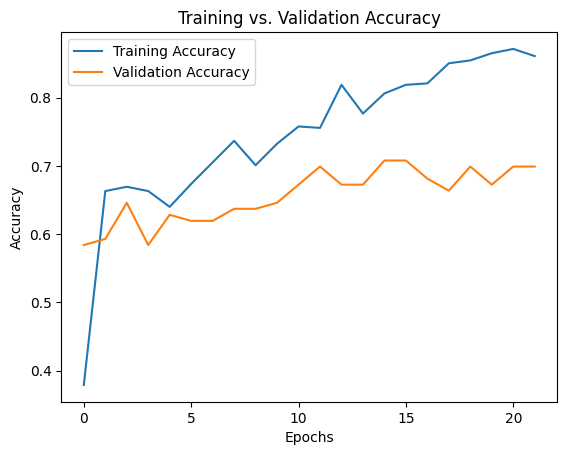

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=['Result_W', 'Result_L', 'Result_D']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

    Result_W       1.00      0.40      0.57         5
    Result_L       0.64      0.78      0.70        50
    Result_D       0.76      0.66      0.70        58

    accuracy                           0.70       113
   macro avg       0.80      0.61      0.66       113
weighted avg       0.72      0.70      0.70       113



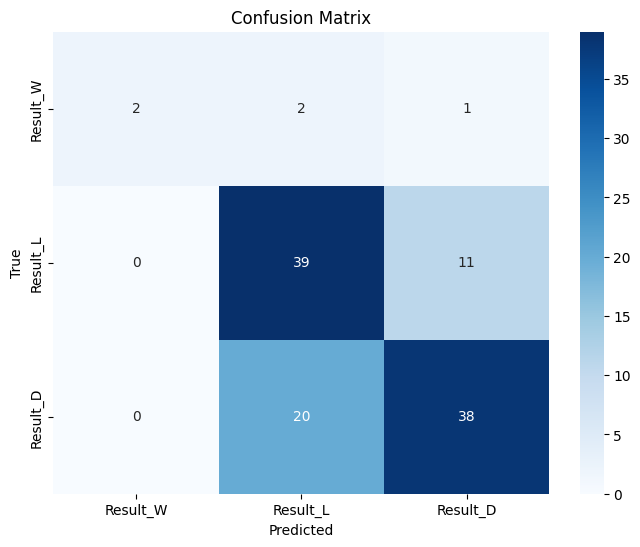

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Result_W', 'Result_L', 'Result_D'], yticklabels=['Result_W', 'Result_L', 'Result_D'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
ModelLoss , ModelAccuracy = model.evaluate(X_test,Y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model accuracy is : {}'.format(ModelAccuracy))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.7016 
Model Loss is 0.7423692345619202
Model accuracy is : 0.6991150379180908


In [ ]:
y_pred_proba = model.predict(X_unseen)
# Get class predictions
y_pred_classes = np.argmax(y_pred_proba, axis=1)
# Map class indices to labels
class_labels = ['Result_W', 'Result_L', 'Result_D']
predicted_labels = [class_labels[i] for i in y_pred_classes]

print("Actual Results:")
print(Y_unseen)
print("Predicted Results:")
for label in predicted_labels:
    print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Actual Results:
     Result_D  Result_L  Result_W
541       0.0       0.0       1.0
83        0.0       1.0       0.0
354       0.0       1.0       0.0
429       0.0       1.0       0.0
432       0.0       1.0       0.0
140       0.0       1.0       0.0
Predicted Results:
Result_D
Result_L
Result_L
Result_L
Result_L
Result_L


                   Feature  Importance
9       Round_Matchweek 17    4.677680
44      Opponent_Brentford    4.669284
86    Team_SheffieldUnited    4.647197
57  Opponent_Sheffield Utd    4.583514
1        Round_Matchweek 1    4.456058
..                     ...         ...
30      Round_Matchweek 36    2.865228
76            Team_Chelsea    2.710069
95                      FK    2.682062
37       Round_Matchweek 8    2.620927
61       Formation_3-2-4-1    2.539577

[98 rows x 2 columns]


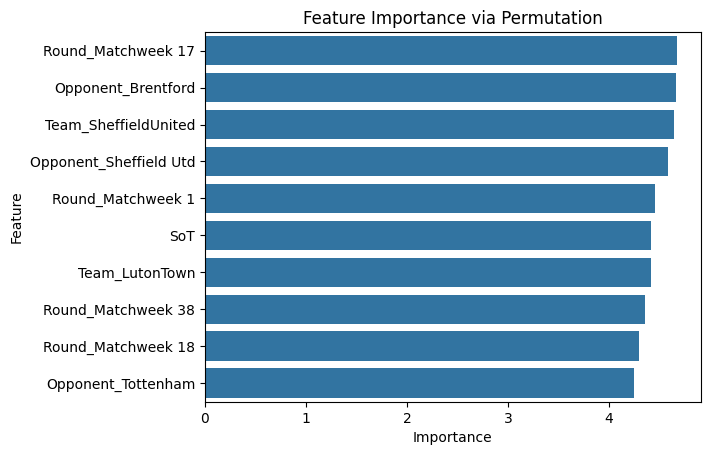

In [ ]:
weights = model.layers[0].get_weights()[0]

feature_importance = np.abs(weights).sum(axis=1)

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

top_10_features = feature_importance_df.head(10)
sns.barplot(data=top_10_features, x='Importance', y='Feature')
plt.title('Feature Importance via Permutation')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
weights = [layer.get_weights()[0] for layer in model.layers if len(layer.get_weights()) > 0]
biases = [layer.get_weights()[1] for layer in model.layers if len(layer.get_weights()) > 1]

for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Layer {i+1} - Weights shape: {w.shape}, Biases shape: {b.shape}")


Layer 1 - Weights shape: (98, 32), Biases shape: (32,)
Layer 2 - Weights shape: (32, 128), Biases shape: (128,)
Layer 3 - Weights shape: (128, 64), Biases shape: (64,)
Layer 4 - Weights shape: (64, 3), Biases shape: (3,)


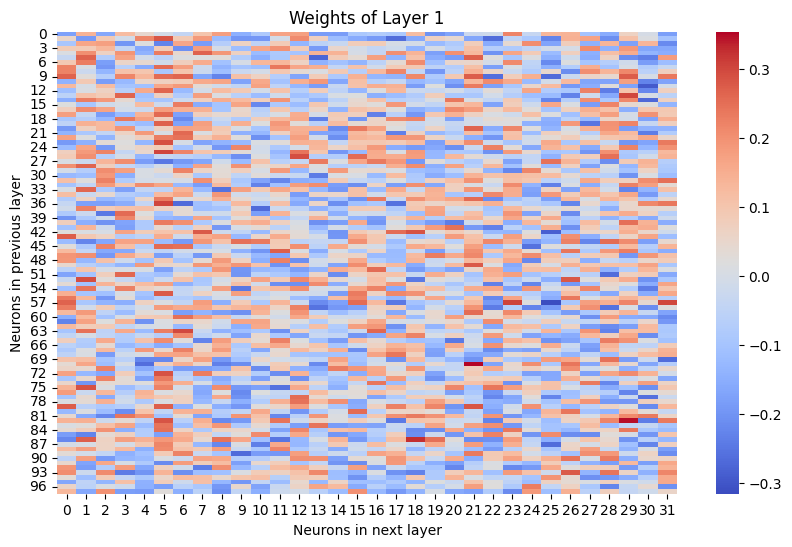

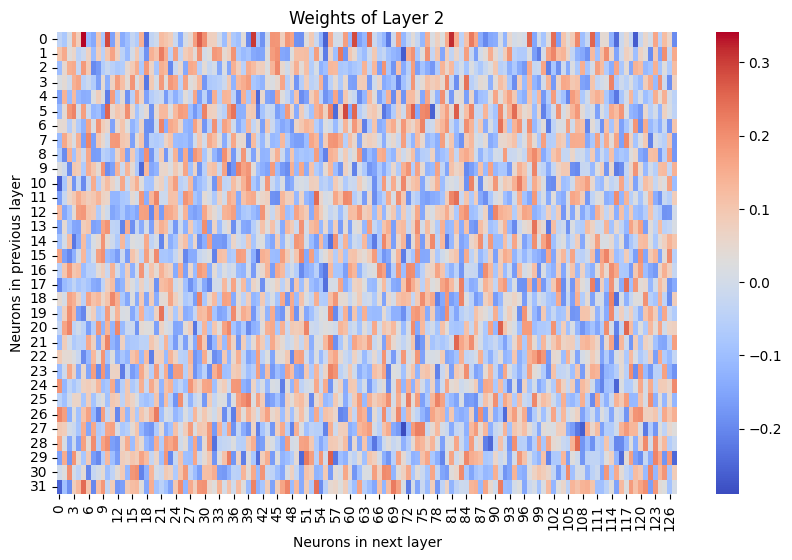

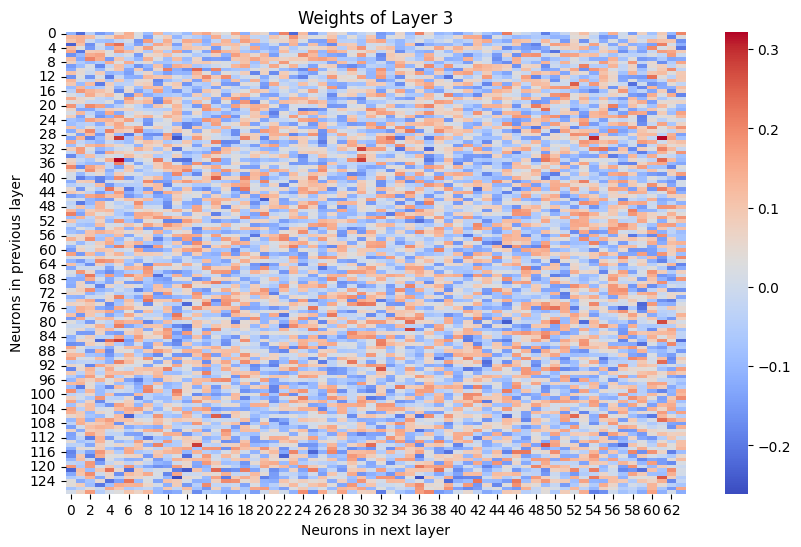

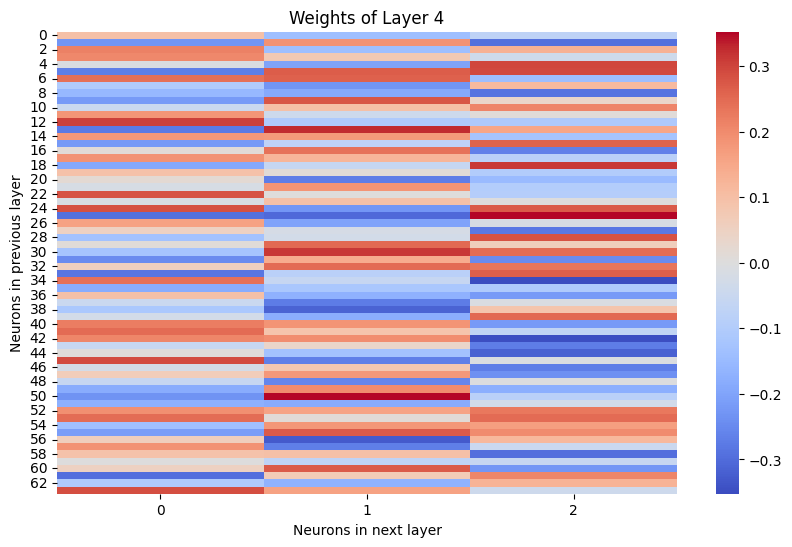

In [ ]:
for i, weight_matrix in enumerate(weights):
    plt.figure(figsize=(10, 6))
    sns.heatmap(weight_matrix, cmap='coolwarm', annot=False)
    plt.title(f"Weights of Layer {i+1}")
    plt.xlabel("Neurons in next layer")
    plt.ylabel("Neurons in previous layer")
    plt.show()

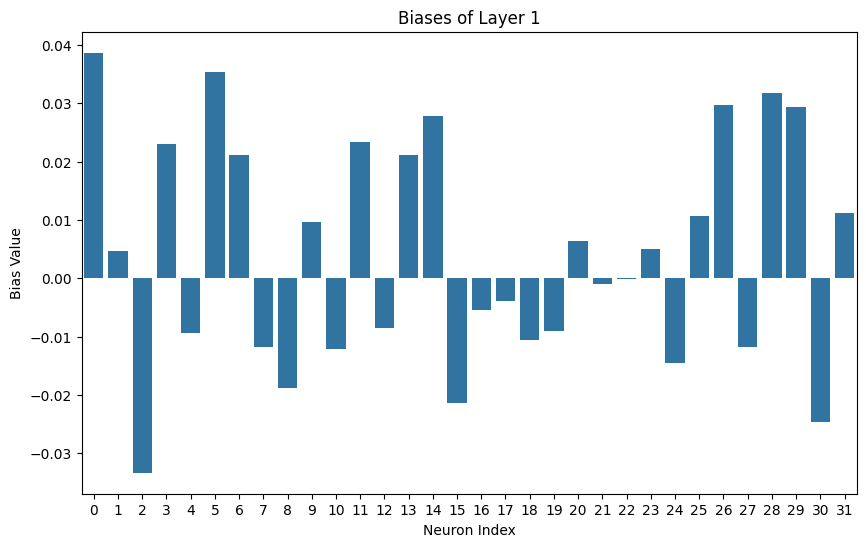

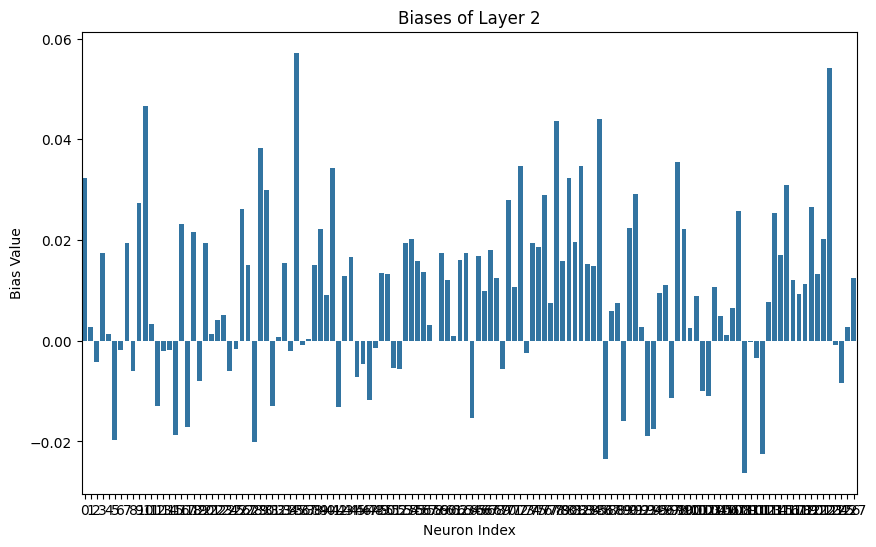

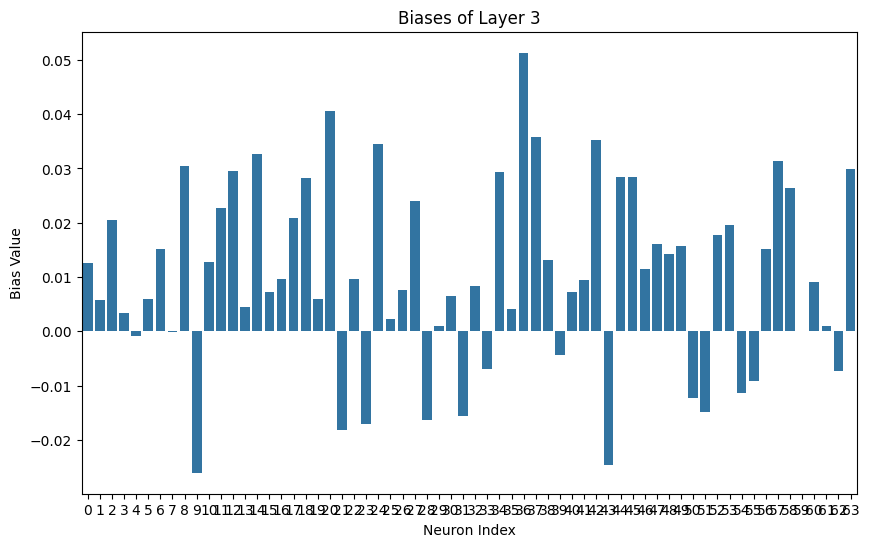

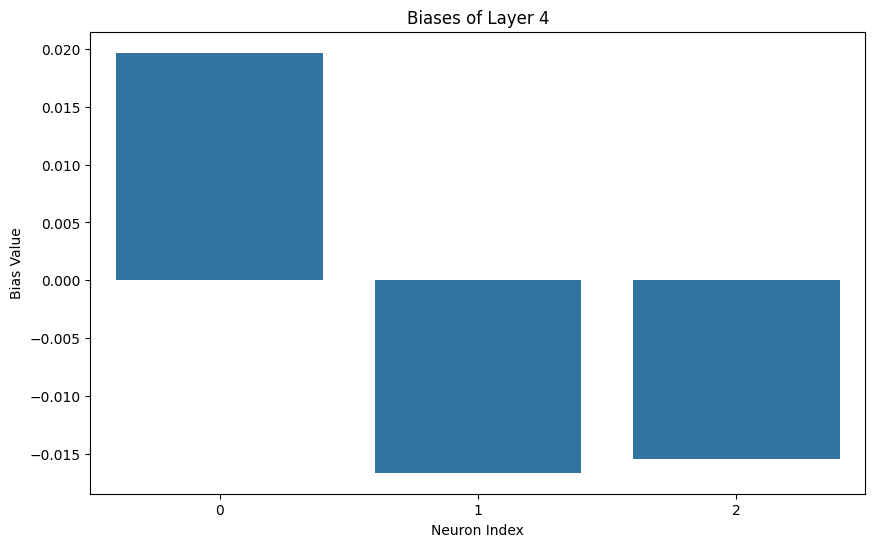

In [ ]:
for i, bias_vector in enumerate(biases):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=np.arange(len(bias_vector)), y=bias_vector)
    plt.title(f"Biases of Layer {i+1}")
    plt.xlabel("Neuron Index")
    plt.ylabel("Bias Value")
    plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7779 - loss: 0.5249 - val_accuracy: 0.6991 - val_loss: 0.7434
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7986 - loss: 0.4041 - val_accuracy: 0.7080 - val_loss: 0.7445
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7850 - loss: 0.4292 - val_accuracy: 0.6991 - val_loss: 0.7517
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.4793 - val_accuracy: 0.6903 - val_loss: 0.7538
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.4288 - val_accuracy: 0.7080 - val_loss: 0.7458
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.3873 - val_accuracy: 0.6903 - val_loss: 0.7529
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.4282 - val_accuracy: 0.6991 - val_loss: 0.7479
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.3990 - val_accuracy: 0.7168 - val_loss

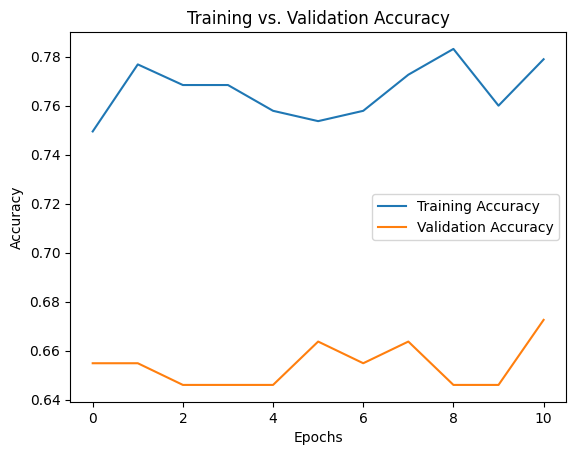

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=['Result_W', 'Result_L', 'Result_D']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

    Result_W       0.00      0.00      0.00         5
    Result_L       0.62      0.70      0.66        50
    Result_D       0.75      0.67      0.71        58

    accuracy                           0.65       113
   macro avg       0.46      0.46      0.46       113
weighted avg       0.66      0.65      0.66       113



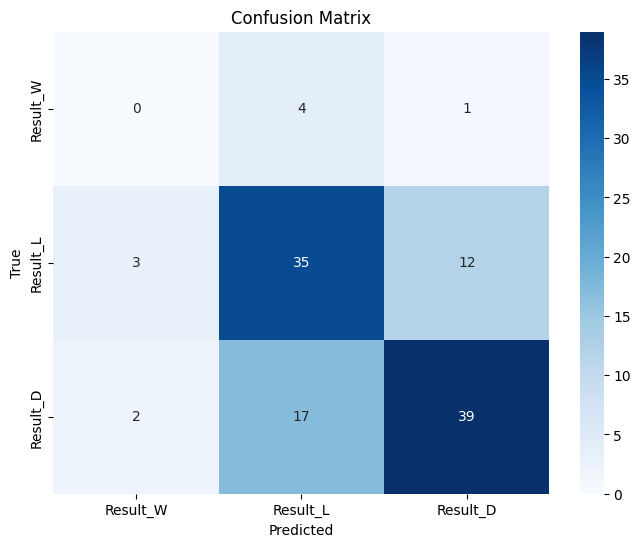

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Result_W', 'Result_L', 'Result_D'], yticklabels=['Result_W', 'Result_L', 'Result_D'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
ModelLoss , ModelAccuracy = model.evaluate(X_test,Y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model accuracy is : {}'.format(ModelAccuracy))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.8030 
Model Loss is 0.840040922164917
Model accuracy is : 0.6548672318458557


In [ ]:
y_pred_proba = model.predict(X_unseen)

# Get class predictions (most probable class)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Map class indices to labels
class_labels = ['Result_W', 'Result_L', 'Result_D']
predicted_labels = [class_labels[i] for i in y_pred_classes]

# Display predictions
for label in predicted_labels:
    print(label)

print(Y_unseen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Result_L
Result_L
Result_L
Result_L
Result_L
Result_L
     Result_D  Result_L  Result_W
541       0.0       0.0       1.0
83        0.0       1.0       0.0
354       0.0       1.0       0.0
429       0.0       1.0       0.0
432       0.0       1.0       0.0
140       0.0       1.0       0.0
